In [19]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("general_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [5]:
data.shape

(4410, 24)

In [13]:
#encodes 'Yes'=1,'No'=0 for Attrition column
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
data['Attrition'] = encoder1.fit_transform(data['Attrition'])

#encodes 'Male'=1,'Female'=0 for Gender column
from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
data['Gender'] = encoder2.fit_transform(data['Gender'])


In [44]:
data.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.039352,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,0.018125,-0.010290,-0.031176,0.042345,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.044173,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,-0.016547,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.013165,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
Gender,-0.039352,0.018125,-0.044173,-0.016547,NaN,-0.013165,1.000000,-0.026854,0.007530,-0.066924,0.011841,NaN,0.019237,-0.027598,-0.030167,-0.017277,-0.021812,0.004438
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,-0.026854,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.007530,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,0.042345,-0.013843,-0.016250,NaN,-0.001117,-0.066924,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667


-0.159205006866 1.99680161588e-26
NEGETIVE CORRELATION


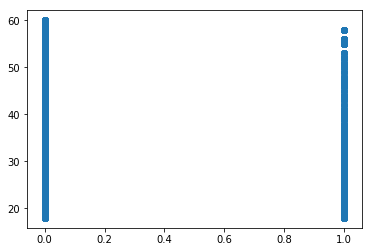

In [34]:
#Correlation between Attrition and Age
stats,p=pearsonr(data.Attrition,data.Age)
print(stat1,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")

plt.scatter(data.Attrition,data.Age)
plt.show()

-0.00973014101018 0.518286042807
NEGETIVE CORRELATION


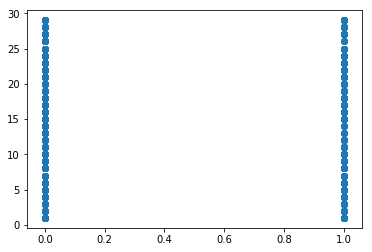

In [46]:
#Correlation between Attrition and distance from home
stats,p=pearsonr(data.Attrition,data.DistanceFromHome)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.DistanceFromHome)
plt.show()

0.018125078877 0.228819709518
POSITIVE CORRELATION


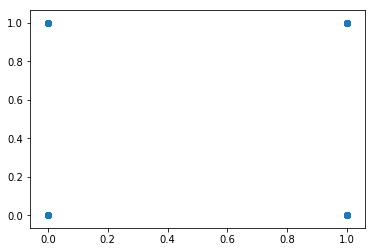

In [45]:
#Correlation between Attrition and Gender
stats,p=pearsonr(data.Attrition,data.Gender)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.Gender)
plt.show()

-0.015111167711 0.315729317712
NEGETIVE CORRELATION


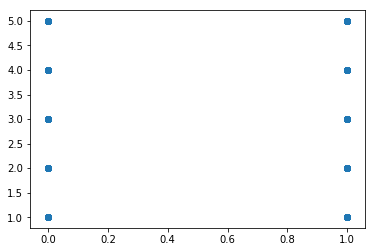

In [36]:
#Correlation between Attrition and Education
stats,p=pearsonr(data.Attrition,data.Education)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.Education)
plt.show()

-0.00472912299507 0.753548740189
NEGETIVE CORRELATION


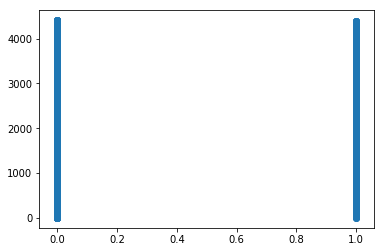

In [37]:
#Correlation between Attrition and EmployeeID
stats,p=pearsonr(data.Attrition,data.EmployeeID)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.EmployeeID)
plt.show()

-0.0102897132875 0.49451717272
NEGETIVE CORRELATION


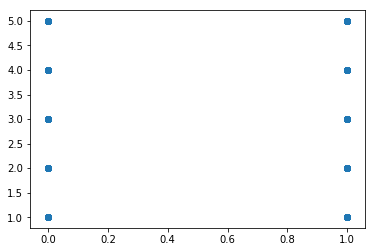

In [38]:
#Correlation between Attrition and JobLevel
stats,p=pearsonr(data.Attrition,data.JobLevel)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.JobLevel)
plt.show()

-0.0311762816981 0.038427484906
NEGETIVE CORRELATION


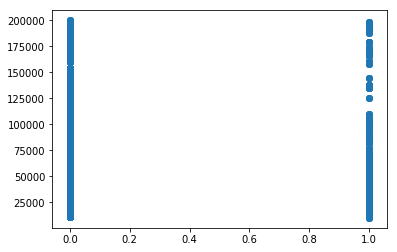

In [40]:
#Correlation between Attrition and MonthlyIncome
stats,p=pearsonr(data.Attrition,data.MonthlyIncome)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.MonthlyIncome)
plt.show()

0.0325325948911 0.0307433864333
POSITIVE CORRELATION


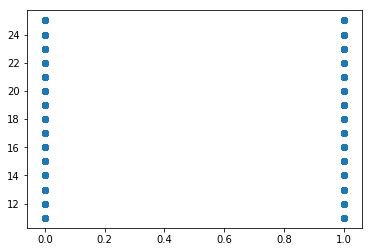

In [41]:
#Correlation between Attrition and PercentSalaryHike
stats,p=pearsonr(data.Attrition,data.PercentSalaryHike)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.PercentSalaryHike)
plt.show()

-0.0494305762443 0.00102470619153
NEGETIVE CORRELATION


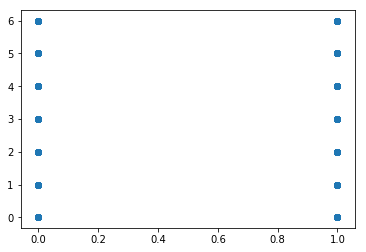

In [42]:
#Correlation between Attrition and TrainingTimesLastYear
stats,p=pearsonr(data.Attrition,data.TrainingTimesLastYear)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.TrainingTimesLastYear)
plt.show()

-0.13439221399 3.16388312248e-19
NEGETIVE CORRELATION


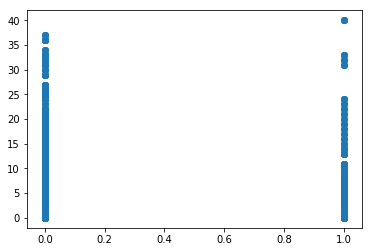

In [43]:
#Correlation between Attrition and YearsAtCompany
stats,p=pearsonr(data.Attrition,data.YearsAtCompany)
print(stats,p)
if (stats==0):
    print("NO CORRELATION")
elif(stats<0):
    print("NEGETIVE CORRELATION")
else:
    print("POSITIVE CORRELATION")
plt.scatter(data.Attrition,data.YearsAtCompany)
plt.show()